In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Read in the data
movies = pd.read_csv("movies.csv")

In [45]:
# Review the data

movies.head(2)

name  rating  genre  year   released  score     votes  director  writer  \
0  6587       6      6  1980 1980-06-13    8.4  927000.0      2589    4014   
1  5573       6      1  1980 1980-07-02    5.8   65000.0      2269    1632   

   star  country    budget     gross  company  runtime  released_year  
0  1047       54  19000000  46998772     2319    146.0           1980  
1   327       55   4500000  58853106      731    104.0           1980

In [4]:
# Checking to see if there is any missing data
for col in movies.columns:
   pct_missing = np.mean(movies[col].isnull())
   print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
movies_isnull = movies.isnull().any().any()
movies_isnull

np.True_

In [6]:
# Column datatype
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Changing float data types to integers for some columns
#movies['budget'] = movies['budget'].astype('int64')

#movies['gross'] = movies['gross'].astype('int64')

# using following because the above did not work due to nulls
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
# Now replace NaN with 0 or another value if needed
movies.fillna({"budget":0}, inplace=True)
#movies['budget'].fillna(0, inplace=True)
movies['budget'] = movies['budget'].astype('int64')


movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
# Now replace NaN with 0 or another value if needed
movies.fillna({"gross":0}, inplace=True)

movies['gross'] = movies['gross'].astype('int64')



In [46]:
movies.head(2)

name  rating  genre  year   released  score     votes  director  writer  \
0  6587       6      6  1980 1980-06-13    8.4  927000.0      2589    4014   
1  5573       6      1  1980 1980-07-02    5.8   65000.0      2269    1632   

   star  country    budget     gross  company  runtime  released_year  
0  1047       54  19000000  46998772     2319    146.0           1980  
1   327       55   4500000  58853106      731    104.0           1980

In [9]:

movies['released'] = movies['released'].fillna('').astype(str)

# Step 2: Remove the extra text "(United States)" using a regular expression
movies['released'] = movies['released'].str.replace(r'\s\(.+?\)', '', regex=True)

# Step 3: Convert the cleaned-up date column to datetime format
movies['released'] = pd.to_datetime(movies['released'], format='%B %d, %Y', errors='coerce')

# Step 4: Extract the year
movies['released_year'] = movies['released'].dt.year

movies['released_year'] = movies['year'].fillna(0).astype(int)

In [47]:
movies.head(2)


name  rating  genre  year   released  score     votes  director  writer  \
0  6587       6      6  1980 1980-06-13    8.4  927000.0      2589    4014   
1  5573       6      1  1980 1980-07-02    5.8   65000.0      2269    1632   

   star  country    budget     gross  company  runtime  released_year  
0  1047       54  19000000  46998772     2319    146.0           1980  
1   327       55   4500000  58853106      731    104.0           1980

In [48]:
movies_sort = movies.sort_values(by=['gross'], inplace=False, ascending=False)
movies_sort.head(2)

name  rating  genre  year   released  score      votes  director  \
5445   533       5      0  2009 2009-12-18    7.8  1100000.0      1155   
7445   535       5      0  2019 2019-04-26    8.4   903000.0       162   

      writer  star  country     budget       gross  company  runtime  \
5445    1778  2334       55  237000000  2847246203     2253    162.0   
7445     743  2241       55  356000000  2797501328     1606    181.0   

      released_year  
5445           2009  
7445           2019

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
# Drop any duplicates in column company
movies['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [14]:
movies.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                    name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG

### Which columns are most correlated to gross revenue?

My guesses are:
- high budget will have correlation to high revenue
- bigger(more popular) company will have high revenue

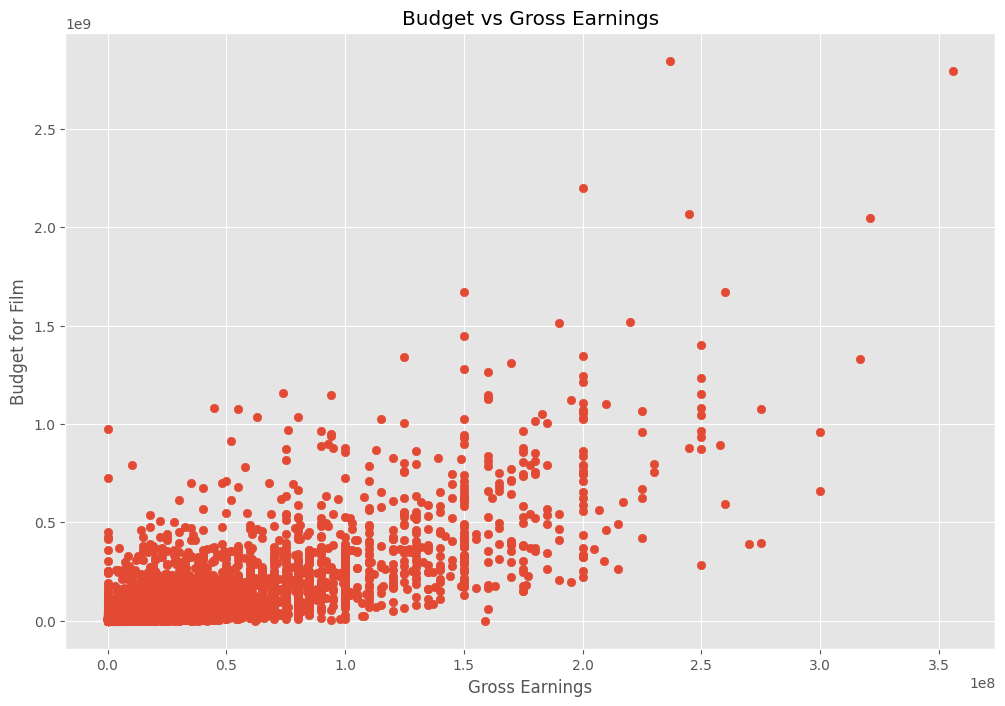

In [15]:
# Create scatter plot with budget vs. gross

plt.scatter(x=movies['budget'], y=movies['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

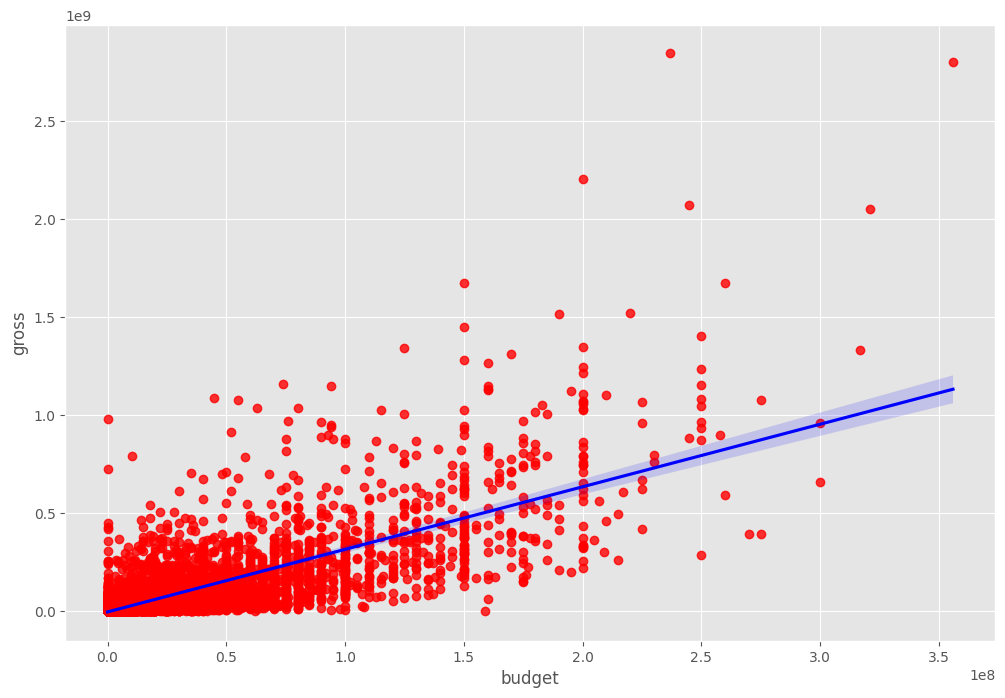

In [17]:
# Plot the budget vs gross using seaborn --> regression plot with added detail to dots and line

sns.regplot(x='budget', y='gross', data=movies, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [18]:
# Checking correlation
# Get numerical columns as correlation can only be done on numerical columns
numeric_cols = ['budget', 'gross', 'runtime', 'score', 'votes', 'released_year']

# Now calculate the correlation for numeric columns only - default/pearon method
corr_matrix = movies[numeric_cols].corr(method='pearson')

corr_matrix

budget     gross   runtime     score     votes  released_year
budget         1.000000  0.750157  0.269510  0.055665  0.486862       0.309212
gross          0.750157  1.000000  0.245235  0.186392  0.632834       0.261900
runtime        0.269510  0.245235  1.000000  0.399451  0.309212       0.120811
score          0.055665  0.186392  0.399451  1.000000  0.409182       0.097995
votes          0.486862  0.632834  0.309212  0.409182  1.000000       0.222945
released_year  0.309212  0.261900  0.120811  0.097995  0.222945       1.000000

In [20]:
corr_matrix = movies[numeric_cols].corr(method='pearson')

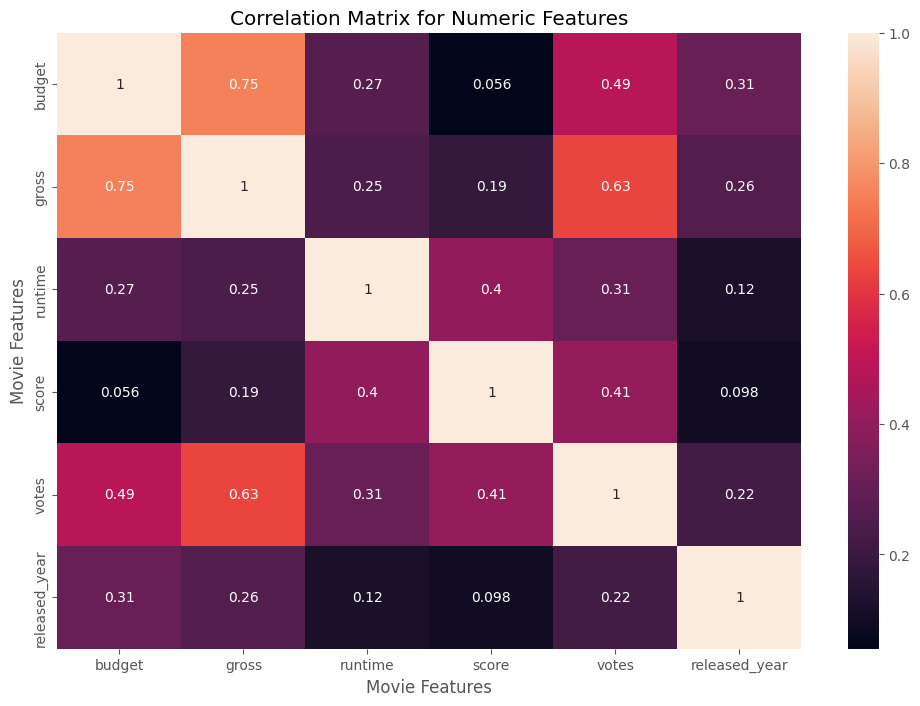

In [21]:
sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [49]:
movies_numerized = movies

for col in movies_numerized:
    if (movies_numerized[col].dtype == 'object'):
        movies_numerized[col] = movies_numerized[col].astype('category')
        movies_numerized[col] =  movies_numerized[col].cat.codes

movies_numerized.head(2)

name  rating  genre  year   released  score     votes  director  writer  \
0  6587       6      6  1980 1980-06-13    8.4  927000.0      2589    4014   
1  5573       6      1  1980 1980-07-02    5.8   65000.0      2269    1632   

   star  country    budget     gross  company  runtime  released_year  
0  1047       54  19000000  46998772     2319    146.0           1980  
1   327       55   4500000  58853106      731    104.0           1980

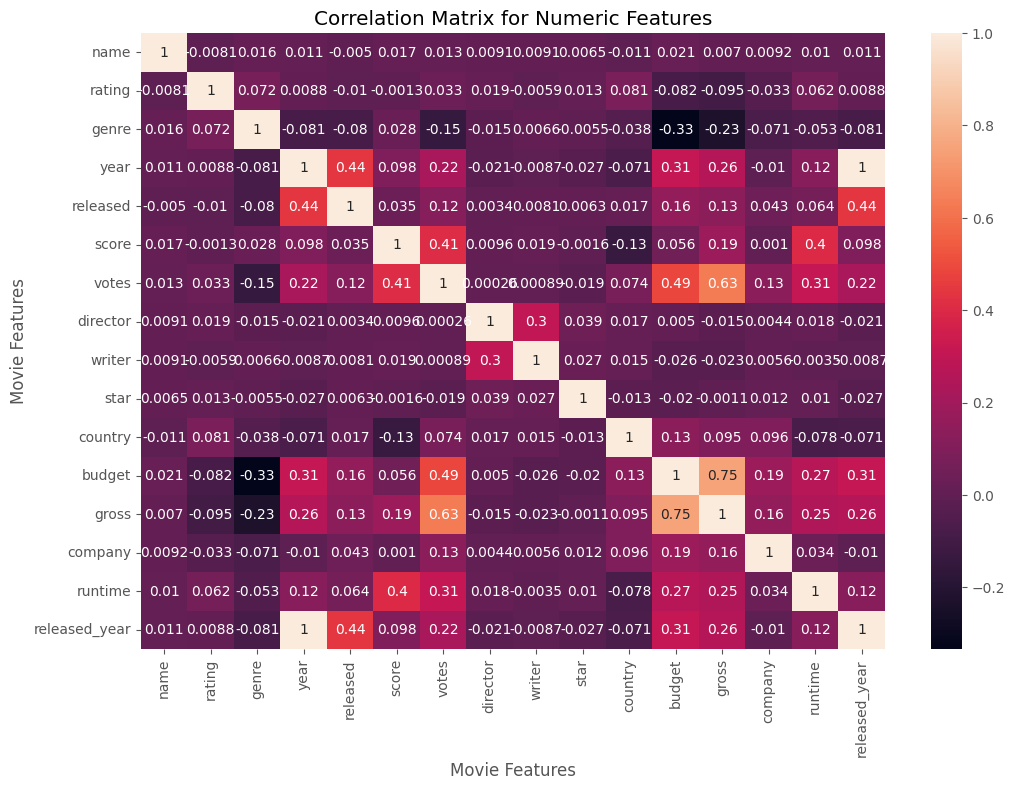

In [23]:
# using movies numerized
corr_matrix_numerized = movies_numerized.corr(method='pearson')

sns.heatmap(corr_matrix_numerized, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [24]:

corr_matrix_numerized = movies_numerized.corr(method='pearson')

# separating the list to show pairs without being under specific categories
corr_pairs = corr_matrix_numerized.unstack()

In [26]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre          budget          -0.334021
budget         genre           -0.334021
gross          genre           -0.234297
genre          gross           -0.234297
               votes           -0.145307
votes          genre           -0.145307
score          country         -0.133348
country        score           -0.133348
gross          rating          -0.095450
rating         gross           -0.095450
               budget          -0.081939
budget         rating          -0.081939
year           genre           -0.081261
genre          released_year   -0.081261
released_year  genre           -0.081261
genre          year            -0.081261
               released        -0.080051
released       genre           -0.080051
country        runtime         -0.078412
runtime        country         -0.078412
genre          company         -0.071067
company        genre           -0.071067
country        year            -0.070938
year           country         -0.070938
country        r

In [36]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


gross          votes            0.632834
votes          gross            0.632834
gross          budget           0.750157
budget         gross            0.750157
name           name             1.000000
year           released_year    1.000000
director       director         1.000000
votes          votes            1.000000
released       released         1.000000
score          score            1.000000
rating         rating           1.000000
genre          genre            1.000000
year           year             1.000000
star           star             1.000000
budget         budget           1.000000
country        country          1.000000
writer         writer           1.000000
gross          gross            1.000000
company        company          1.000000
runtime        runtime          1.000000
released_year  year             1.000000
               released_year    1.000000
dtype: float64

Votes and Budget have the highest correlation to Gross Earnings.

Company has no correlation.